### Open the file temperature_data.csv.

#### Using linear interpolation, find the temperature at hour 12.14
#### Using cubic interpolation, find the temperature at hour 12.14

Using linear interpolation, find the temperature at hour 12.14 is 19.248
Using cubic interpolation, find the temperature at hour 12.14 is 19.24715705749554


C:\Users\xsxwz\AppData\Local\Temp\ipykernel_27740\1105862197.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv('data/temperature_data.csv',delim_whitespace=True)


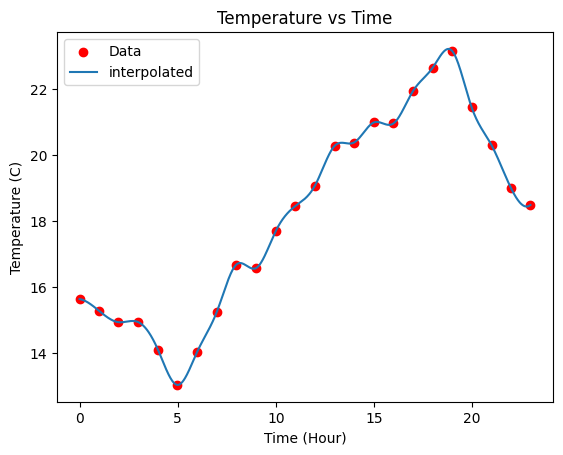

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad,quad_vec

df=pd.read_csv('data/temperature_data.csv',delim_whitespace=True)
df.shape
df.T
time_data,temp_data=df.T.values

plt.scatter(time_data,temp_data,color='r',label='Data')
plt.xlabel('Time (Hour)')
plt.ylabel('Temperature (C)')
plt.title('Temperature vs Time')

density_f=interp1d(time_data,temp_data,kind='linear')
print(f"Using linear interpolation, find the temperature at hour 12.14 is {density_f(12.14)}")
density_f=interp1d(time_data,temp_data,kind='cubic')
print(f"Using cubic interpolation, find the temperature at hour 12.14 is {density_f(12.14)}")
density_f(12.14)

time_interp=np.linspace(min(time_data),max(time_data),1000)
temp_interp=density_f(time_interp)

plt.plot(time_interp,temp_interp,label='interpolated')
plt.legend()


####  Find the average temperature between the 5th and 10th hour by computing $ \overline T=\frac{1}{t_2-t_1} \int_{t_1}^{t_2}T(t)dt$ using the cubic interpolation function where $t1$ and $t2$ are the beginning and end times.

In [19]:
def average(t1,t2):
    return quad(density_f,t1,t2)[0]/(t2-t1)

t1=5
t2=10
average_temp=average(t1,t2)
print(f"The average temperature between {t1} and {t2} is {average_temp} C.")



The average temperature between 5 and 10 is 15.56953156871323 C.


### This question concerns the data examined in Examples 1 and 2 of the Interpolation.ipynb notebook. In particular, $ f(E) $ refers to the spectrum data from photon_spectrum.csv and $ µ(E) $ refers to the attenuation data from lead_attenuation.csv.
#### The mean photon energy of the beam with spectrum $f(E)$ is given by $ E=\frac{(\sum_{\infty} E f(E)dE)}{\sum_\infty f(E) dE} $,Using cubic interpolation, find the mean photon energy


C:\Users\xsxwz\AppData\Local\Temp\ipykernel_27740\2257359681.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_photon=pd.read_csv('data/photon_spectrum.csv',delim_whitespace=True)


The average photon energy is 3.3867755789748273 MeV.


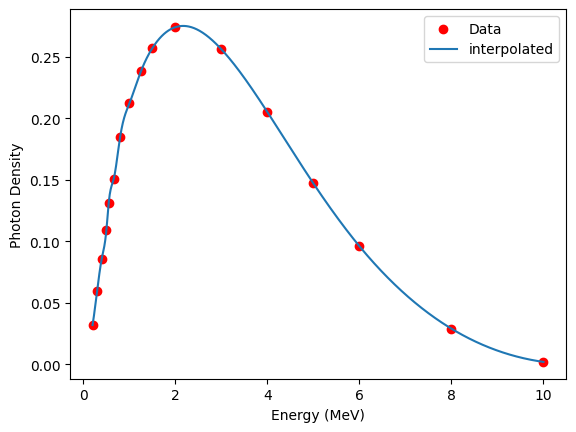

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

df_photon=pd.read_csv('data/photon_spectrum.csv',delim_whitespace=True)
energy_data,density_data=df_photon.T.values
photon_f=interp1d(energy_data,density_data,kind="cubic")
energy_interp=np.linspace(min(energy_data),max(energy_data),1000)
density_interp=photon_f(energy_interp)

plt.scatter(energy_data,density_data,color='r',label='Data')
plt.plot(energy_interp,density_interp,label='interpolated')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('Photon Density')

def quad_f_top(e):
    return e * photon_f(e)
         
quad_f_bottom=photon_f

def average_photon_energy(e1,e2):
    return quad(quad_f_top,e1,e2)[0]/quad(photon_f,e1,e2)[0]

average_energy=average_photon_energy(min(energy_data),max(energy_data))

print(f"The average photon energy is {average_energy} MeV.")


#### The mean photon energy of the beam after passing through solid led of depth x is $ \overline E(x)=\frac{(\int_{\infty}Ef(E)e^{-u(E)x}dx)}{(\int_{\infty}f(E)e^{-u(E)x}dx)} $,Using cubic interpolation, find the mean energy of the photons after passing through 2cm of lead

The average energy of photons that have traveled 2 cm through lead is 3.644322943170502 MeV.


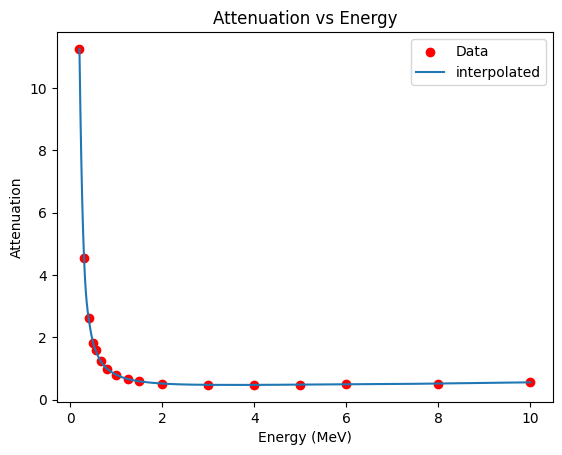

In [32]:
df_lead=pd.read_csv('data/lead_atteunation.csv',delimiter=',')
energy_lead_data,attenuation_data=df_lead.T.values

lead_f=interp1d(energy_lead_data,attenuation_data,kind="cubic")

energy_lead_interp=np.linspace(min(energy_lead_data),max(energy_lead_data),1000)
attenuation_interp=lead_f(energy_lead_interp)

plt.scatter(energy_lead_data,attenuation_data,color='r',label='Data')
plt.plot(energy_lead_interp,attenuation_interp,label='interpolated')
plt.legend()
plt.xlabel('Energy (MeV)')
plt.ylabel('Attenuation')
plt.title('Attenuation vs Energy')

def integrand_top_f(E,x):
    return E*photon_f(E)*np.exp(-lead_f(E)*x)

def integrand_bottom_f(E,x):
    return photon_f(E)*np.exp(-lead_f(E)*x)

x=2
result=quad(integrand_top_f,min(energy_lead_data),max(energy_lead_data),args=(x))[0]/quad(integrand_bottom_f,min(energy_lead_data),max(energy_lead_data),args=(x))[0]
print(f"The average energy of photons that have traveled {x} cm through lead is {result} MeV.")



 #### Plot $ \overline E(x) $ as a function of $ x $ from  $x = 0 cm$ to $x = 5cm$.(Hint: Make use of the quad_vec function to evaluate the numeratorand denominator integrals for many different values of x, then divide the numerator array by the denominator array).

Text(0, 0.5, 'Average Energy (MeV)')

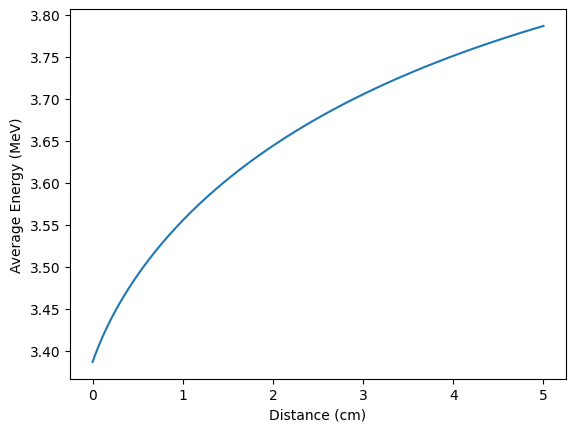

In [35]:
xs=np.linspace(0,5,1000)
numerators_results= quad_vec(integrand_top_f,min(energy_lead_data),max(energy_lead_data),args=(xs,))[0]
denominators_results= quad_vec(integrand_bottom_f,min(energy_lead_data),max(energy_lead_data),args=(xs,))[0]
mean_energies=numerators_results / denominators_results
plt.plot(xs,mean_energies)
plt.xlabel('Distance (cm)')
plt.ylabel('Average Energy (MeV)')